<a href="https://colab.research.google.com/github/Aishwarya2k7/Vector/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis of Video Game Sales.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#csv uploaded using url of github account
#Source of dataset is kaggle
url="https://raw.githubusercontent.com/Aishwarya2k7/Vector/master/vgsales.csv"
df1 = pd.read_csv(url)

###**Preprocessing**


In [ ]:
df1.shape 

(16598, 11)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df1.isnull().sum() 

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df1.duplicated().sum()


0

###**Handling Of Missing Values**

In [ ]:
df1["Publisher"].fillna("Unknown", inplace = True) #Missing publisher data points are filled with UNKNOWN value


In [ ]:
df1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df1 = df1.dropna() #Dropping the rows with missing years

In [ ]:
df1.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

### **Sampling of the Dataset**

In [ ]:
#sample csv uploaded using url of github account
#sampled from the preprocessed dataset seen previously
sample_url="https://raw.githubusercontent.com/Aishwarya2k7/Vector/master/sample_vgsales.csv"
df = pd.read_csv(sample_url)

In [ ]:
df.shape

(1067, 11)

In [ ]:
df['Year'].value_counts() #the counts of unique values will be in descending order so 
#that the first element is the most frequently-occurring element. Excludes NA values by default.

2009.0    107
2008.0     91
2011.0     81
2006.0     75
2007.0     74
2010.0     70
2005.0     64
2013.0     51
2003.0     47
2002.0     43
2014.0     43
2012.0     42
2004.0     34
2001.0     32
2015.0     30
2000.0     29
1998.0     28
1999.0     28
1997.0     20
1996.0     20
2016.0     16
1994.0     11
1995.0      7
1992.0      5
1993.0      4
1981.0      3
1980.0      3
1988.0      2
1990.0      2
1989.0      2
1986.0      1
1987.0      1
1991.0      1
Name: Year, dtype: int64

In [ ]:
df.describe() #summary of statistics of numerical columns

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,1067.000000,1067.00000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,8163.926898,2006.39925,0.267282,0.157732,0.081687,0.051406,0.558463
std,4853.047962,5.79690,0.614339,0.430187,0.340763,0.140215,1.263793
min,13.000000,1980.00000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,3779.000000,2003.00000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8147.000000,2007.00000,0.080000,0.030000,0.000000,0.010000,0.180000
75%,12416.000000,2010.00000,0.250000,0.120000,0.040000,0.040000,0.530000
max,16537.000000,2016.00000,9.000000,6.420000,7.200000,1.680000,23.100000


In [ ]:

# total number of rows and unique rows are not same. Same title must have been released for different platform
len(df1.Name.unique())

11360

In [ ]:
df['Platform'].unique() #all unique platforms in the sample dataframe

array(['PS2', 'PSP', 'PS4', '3DS', 'DS', 'X360', 'Wii', 'PS3', 'PC', 'GB',
       'GBA', 'XB', 'WiiU', 'N64', 'SNES', 'SAT', 'PSV', 'GC', 'PS',
       'XOne', '2600', 'SCD', 'NES', 'DC', 'GG', 'GEN'], dtype=object)

In [ ]:
df['Genre'].unique() #all unique Genres in the sample dataframe

array(['Strategy', 'Sports', 'Adventure', 'Action', 'Puzzle', 'Misc',
       'Simulation', 'Racing', 'Role-Playing', 'Platform', 'Fighting',
       'Shooter'], dtype=object)

In [ ]:
df['Platform'].value_counts() #PS2 is the most frequently used platform, followed by DS

PS2     160
DS      134
PS       98
PS3      85
X360     84
Wii      78
PSP      69
PC       67
XB       42
GBA      39
3DS      36
GC       32
PSV      32
XOne     21
PS4      18
N64      15
SNES     14
2600      8
GB        8
SAT       8
WiiU      6
NES       5
SCD       3
DC        3
GG        1
GEN       1
Name: Platform, dtype: int64

In [ ]:
df['Publisher'].value_counts() #Electronic Arts is the most frequent publisher seen in this dataframe

Electronic Arts                 78
Activision                      60
Sony Computer Entertainment     59
Namco Bandai Games              56
Konami Digital Entertainment    54
                                ..
Media Works                      1
Princess Soft                    1
Yamasa Entertainment             1
Starfish                         1
Oxygen Interactive               1
Name: Publisher, Length: 184, dtype: int64

In [ ]:
df['Genre'].value_counts() #Action is the most frequent genre seen in this dataframe

Action          204
Sports          144
Misc            111
Role-Playing     94
Shooter          94
Adventure        86
Racing           80
Platform         62
Simulation       58
Strategy         54
Fighting         45
Puzzle           35
Name: Genre, dtype: int64

### **Outlier Detection**


#### The following boxplot visualizes the possible outliers in individual columns. since it is the sales data columns we chose to keep the outliers 

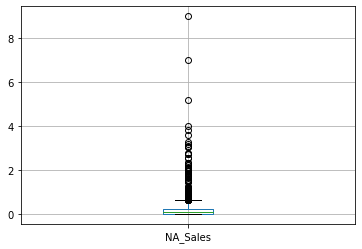

In [ ]:
df.boxplot(column=['NA_Sales'])

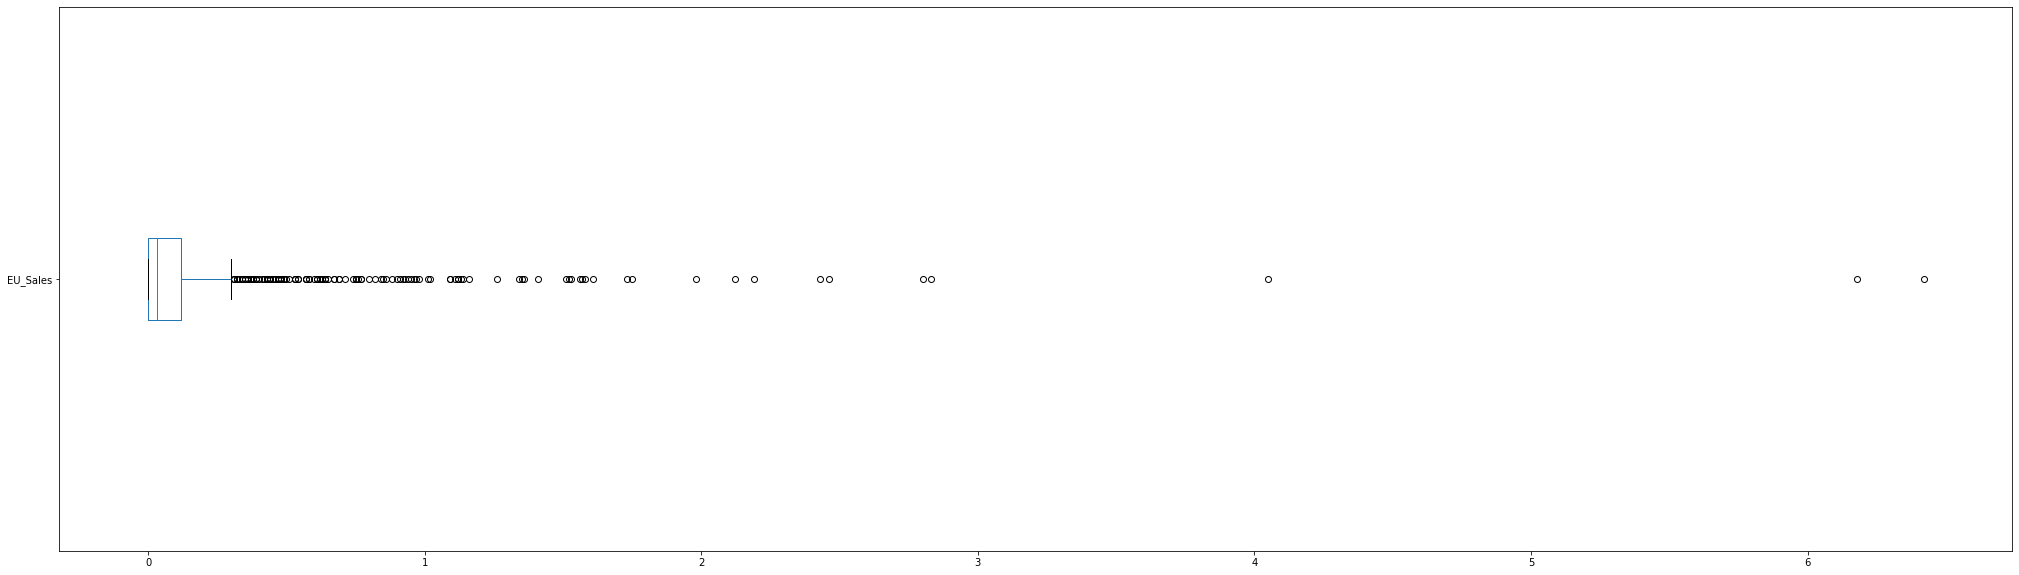

In [ ]:
df['EU_Sales'].plot(kind="box",vert=False,figsize=(35,10))

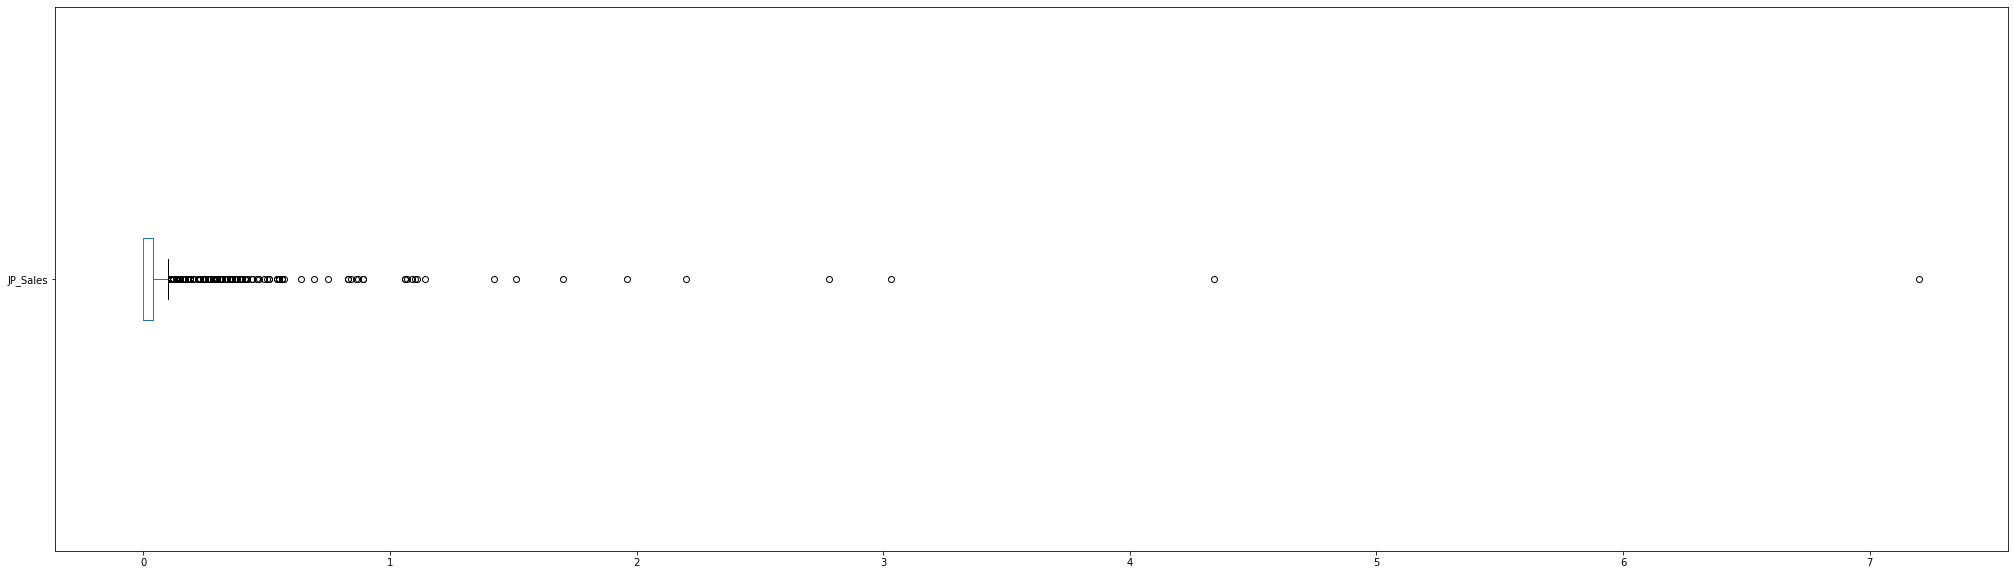

In [ ]:
df['JP_Sales'].plot(kind="box",vert=False,figsize=(35,10))

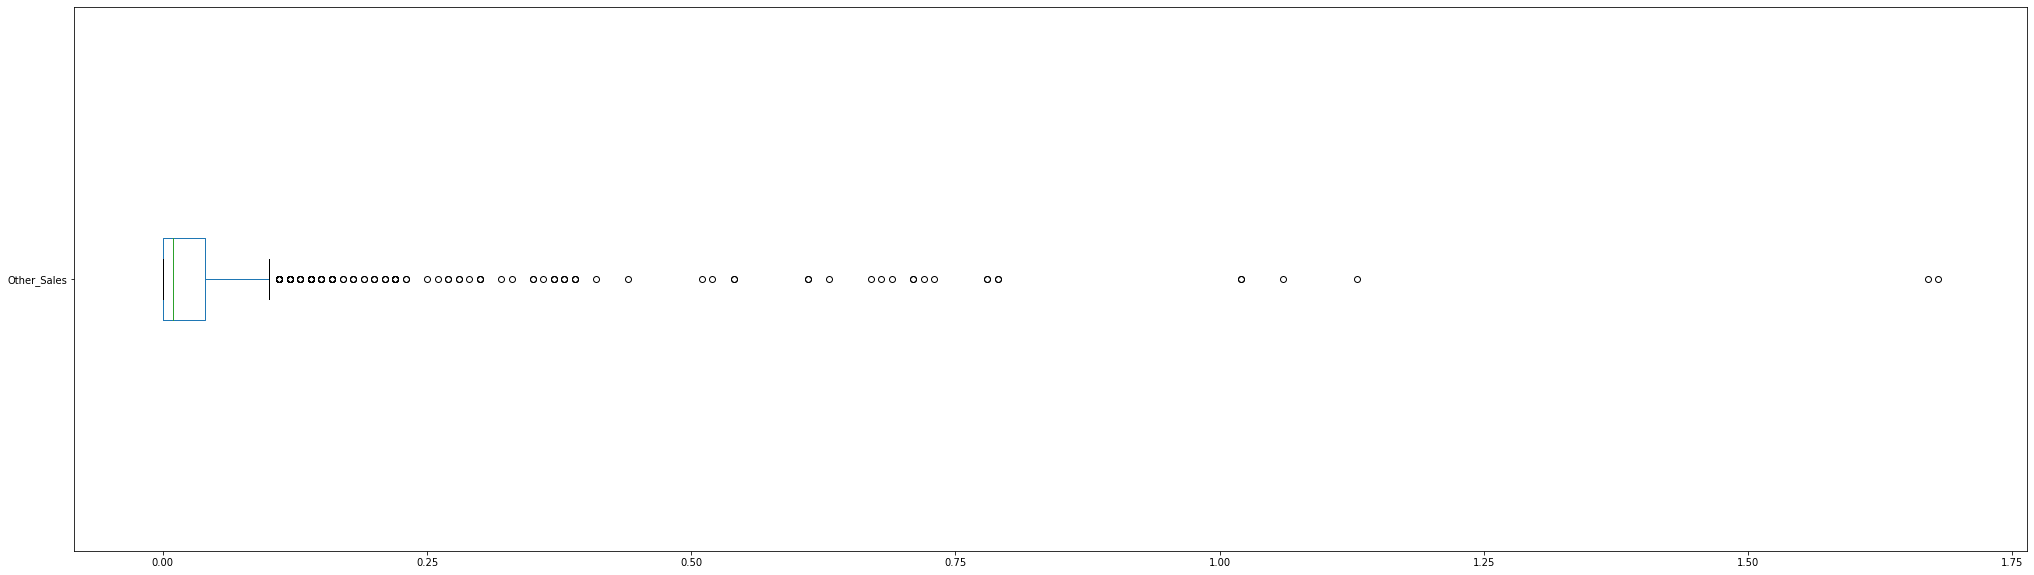

In [ ]:
df['Other_Sales'].plot(kind="box",vert=False,figsize=(35,10))

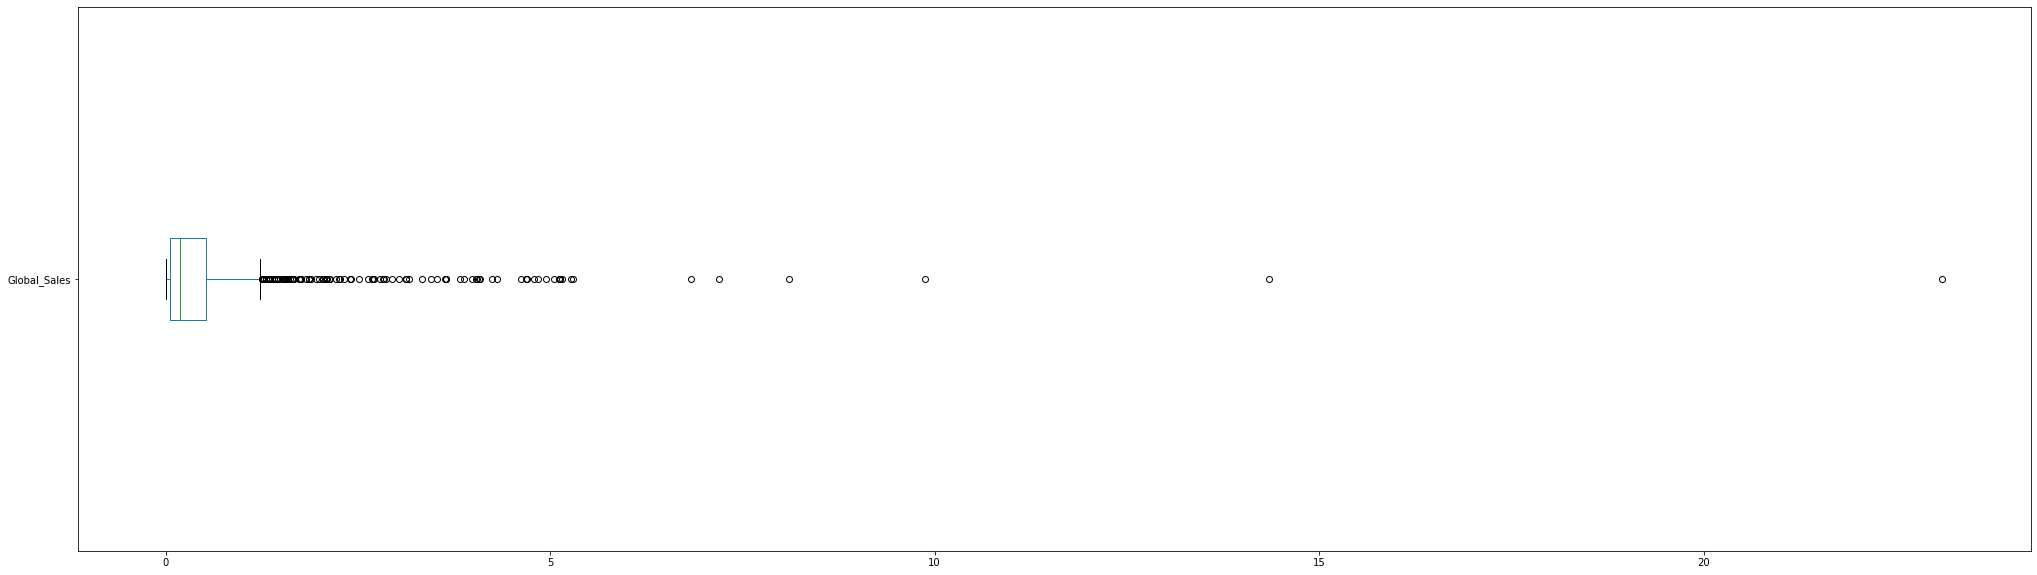

In [ ]:
df['Global_Sales'].plot(kind="box",vert=False,figsize=(35,10))

###**Correlation**

####Correlation depicts the statistical relationship between two variables.
The below table shows the pearson correlation coefficients between each of the numerical variables.

In [ ]:
df.corr(method='pearson')

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.180344,-0.526403,-0.466941,-0.254980,-0.467253,-0.534926
Year,0.180344,1.000000,-0.132622,-0.022410,-0.162982,0.032905,-0.112296
NA_Sales,-0.526403,-0.132622,1.000000,0.715413,0.465751,0.607514,0.922671
EU_Sales,-0.466941,-0.022410,0.715413,1.000000,0.430624,0.628406,0.874074
JP_Sales,-0.254980,-0.162982,0.465751,0.430624,1.000000,0.198575,0.664571
Other_Sales,-0.467253,0.032905,0.607514,0.628406,0.198575,1.000000,0.673559
Global_Sales,-0.534926,-0.112296,0.922671,0.874074,0.664571,0.673559,1.000000


####From the heatmap below we can find out that the highest correlation is between Global_Sales and NA_Sales(0.92).Overall it appears that Global_Sales has high correlation with other sales columns.  

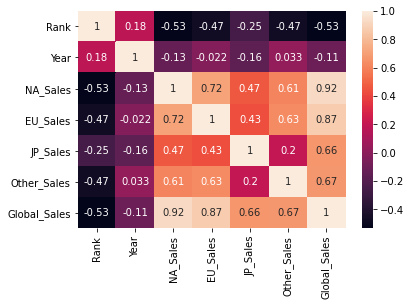

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#**VISUALIZATIONS**

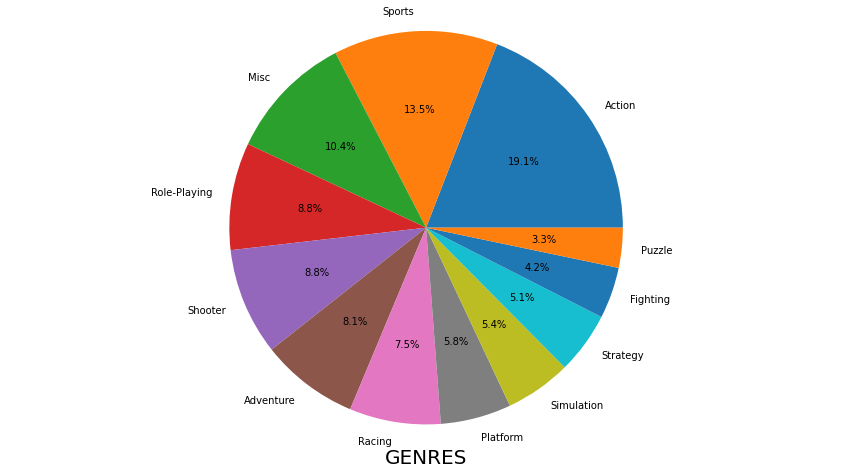

In [ ]:
plt.figure(figsize=(15,8))
a= df['Genre'].value_counts()
genre = a.index
count = a.values
plt.pie(count, labels=genre,autopct='%1.1f%%')
plt.xlabel('GENRES',fontsize=20)
plt.axis('equal')
plt.show()

####The pie chart depicts that there are 12 unique genres and the maximum area is taken by the "Action" genre followed by "Sports" and "miscellanious".

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Sales as per the Genre')

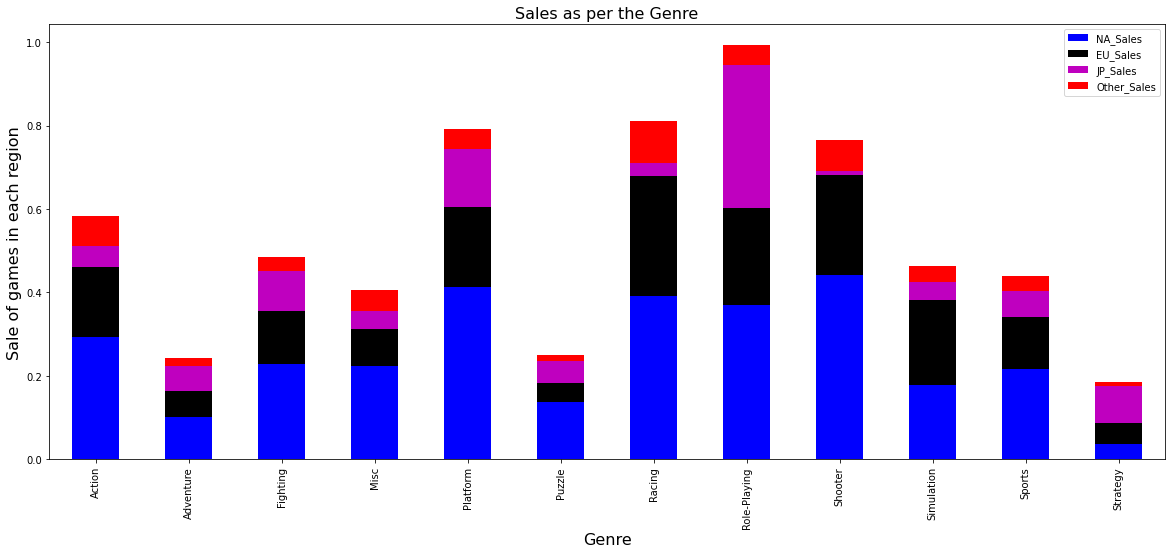

In [ ]:
df['Genre'].unique()
df2 = df.groupby(['Genre']) 
val = df2['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(20,8), color=['b', 'k', 'm', 'r'], stacked=True)
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per the Genre', fontsize=16)

## ####The Shooter genre is most popular in North America compared to all other regions and the least popular in Japan. Racing is the most popular genre within Europe. The Role-Playing genre is the most famous genre in Japan and North America. Racing genre appears to have the heighest sales among "Other_Sales".

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Sales as per the Platform')

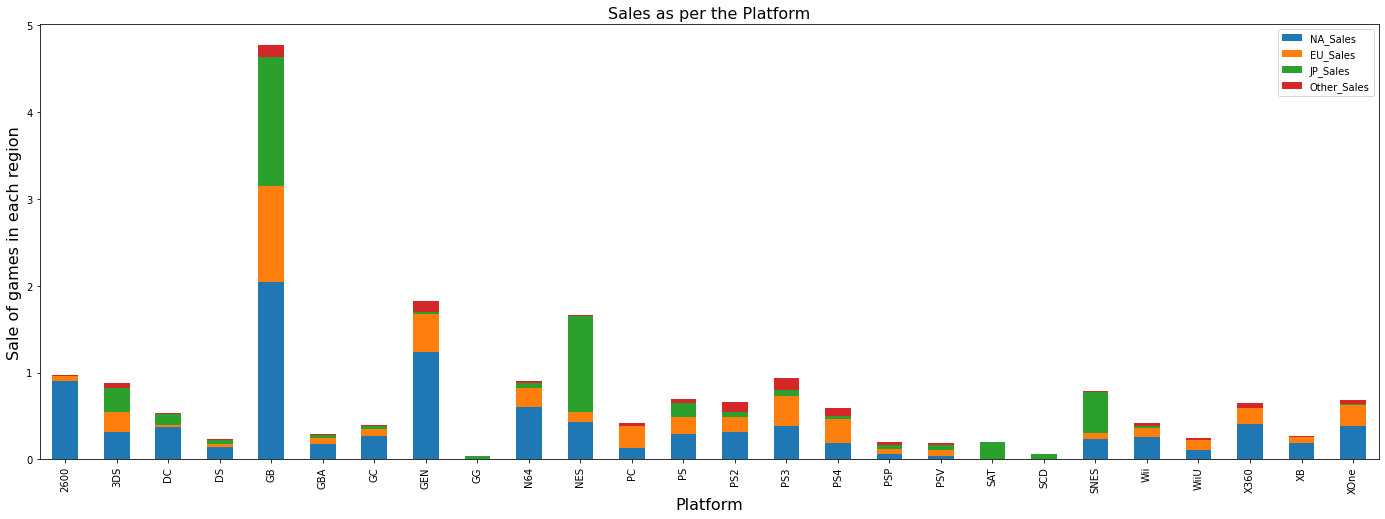

In [ ]:
df['Platform'].unique()
df3 = df.groupby(['Platform'])
val = df3['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(24,8), stacked=True)
plt.xlabel('Platform',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales as per the Platform',fontsize=16)

*italicized text*####GB platform bagged the most sales globally and is the most popular in North America. GG appears to be the least popular. 

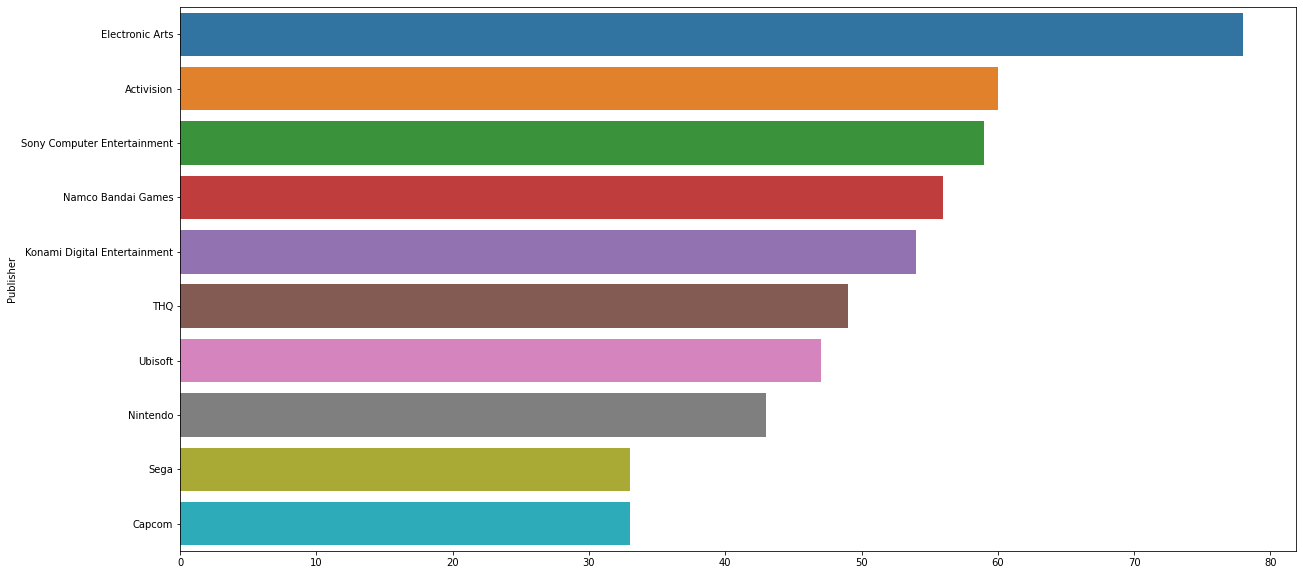

In [ ]:
plt.figure(figsize=(20,10))
top_pub=df.groupby('Publisher')['Publisher'].count().sort_values(ascending = False).head(10)
sns.barplot(x=top_pub.values,y=top_pub.index)

####The above horizontal bar chart shows the frequency count of top 10 publishers, Electronic Arts being the heighest. 

##**Standardization and normalization**

In [ ]:
df2 = df.copy()

In [ ]:
vars = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
df2 = df2.loc[:, vars]
df2 = (df2-df2.mean())/df2.std()

In [ ]:
df2.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,-0.435072,-0.366659,-0.151680,-0.366622,-0.418156
1,-0.435072,-0.366659,0.464585,-0.366622,-0.251990
2,-0.239741,0.214484,-0.210372,0.203932,-0.085823
3,-0.435072,-0.366659,-0.122334,-0.366622,-0.410244
4,-0.435072,-0.366659,-0.122334,-0.366622,-0.410244


###**Distribution of data**

In [ ]:
df2.skew(axis = 0, skipna = True) #skewness

NA_Sales         6.325543
EU_Sales         7.786982
JP_Sales        12.399136
Other_Sales      6.083364
Global_Sales     8.326240
dtype: float64

####The following graph distributions show that they are right skewed as they have a long tail toward the right side.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


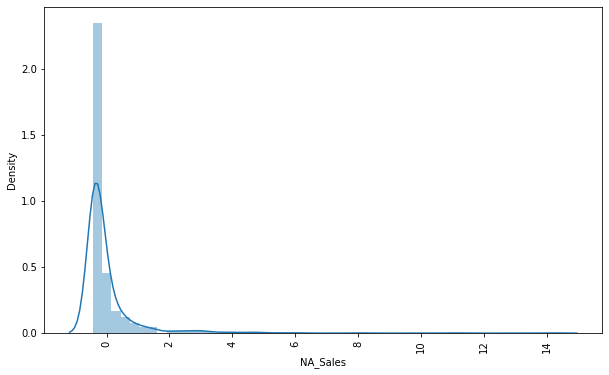

In [ ]:
plt.subplots(figsize=(10,6))
sns.distplot(df2['NA_Sales'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


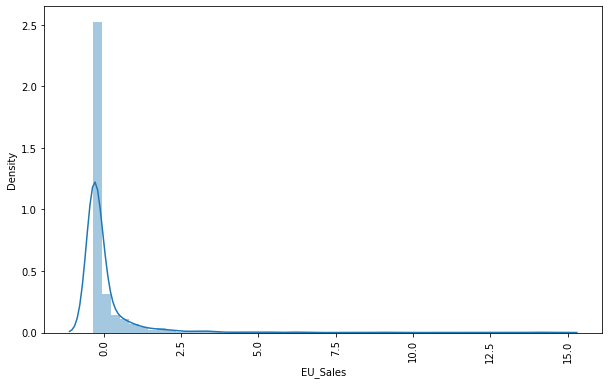

In [ ]:
plt.subplots(figsize=(10,6))
sns.distplot(df2['EU_Sales'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


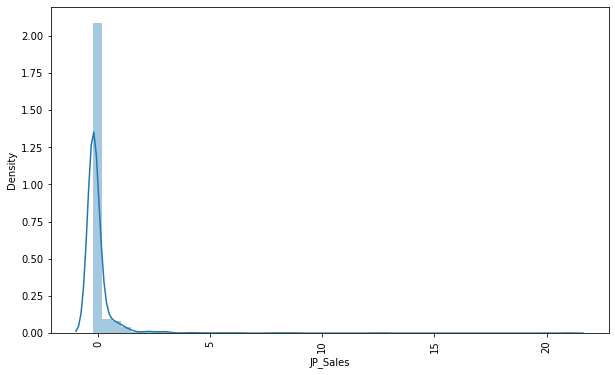

In [ ]:
plt.subplots(figsize=(10,6))
sns.distplot(df2['JP_Sales'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


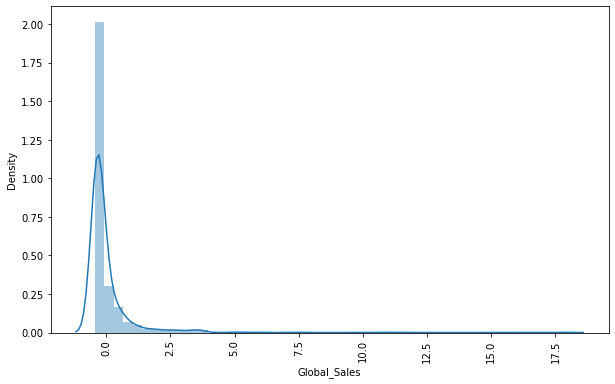

In [ ]:
plt.subplots(figsize=(10,6))
sns.distplot(df2['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


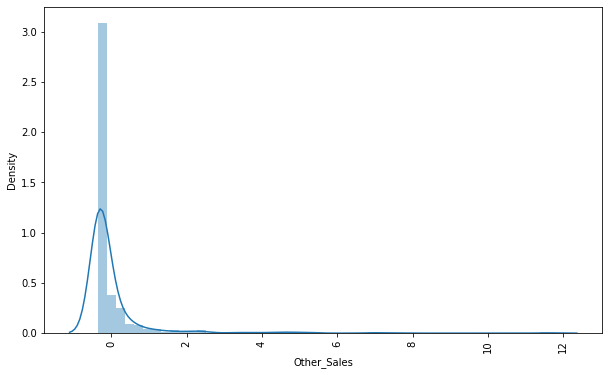

In [ ]:
plt.subplots(figsize=(10,6))
sns.distplot(df2['Other_Sales'])
plt.xticks(rotation=90)
plt.show()

#**Time Series Analysis**


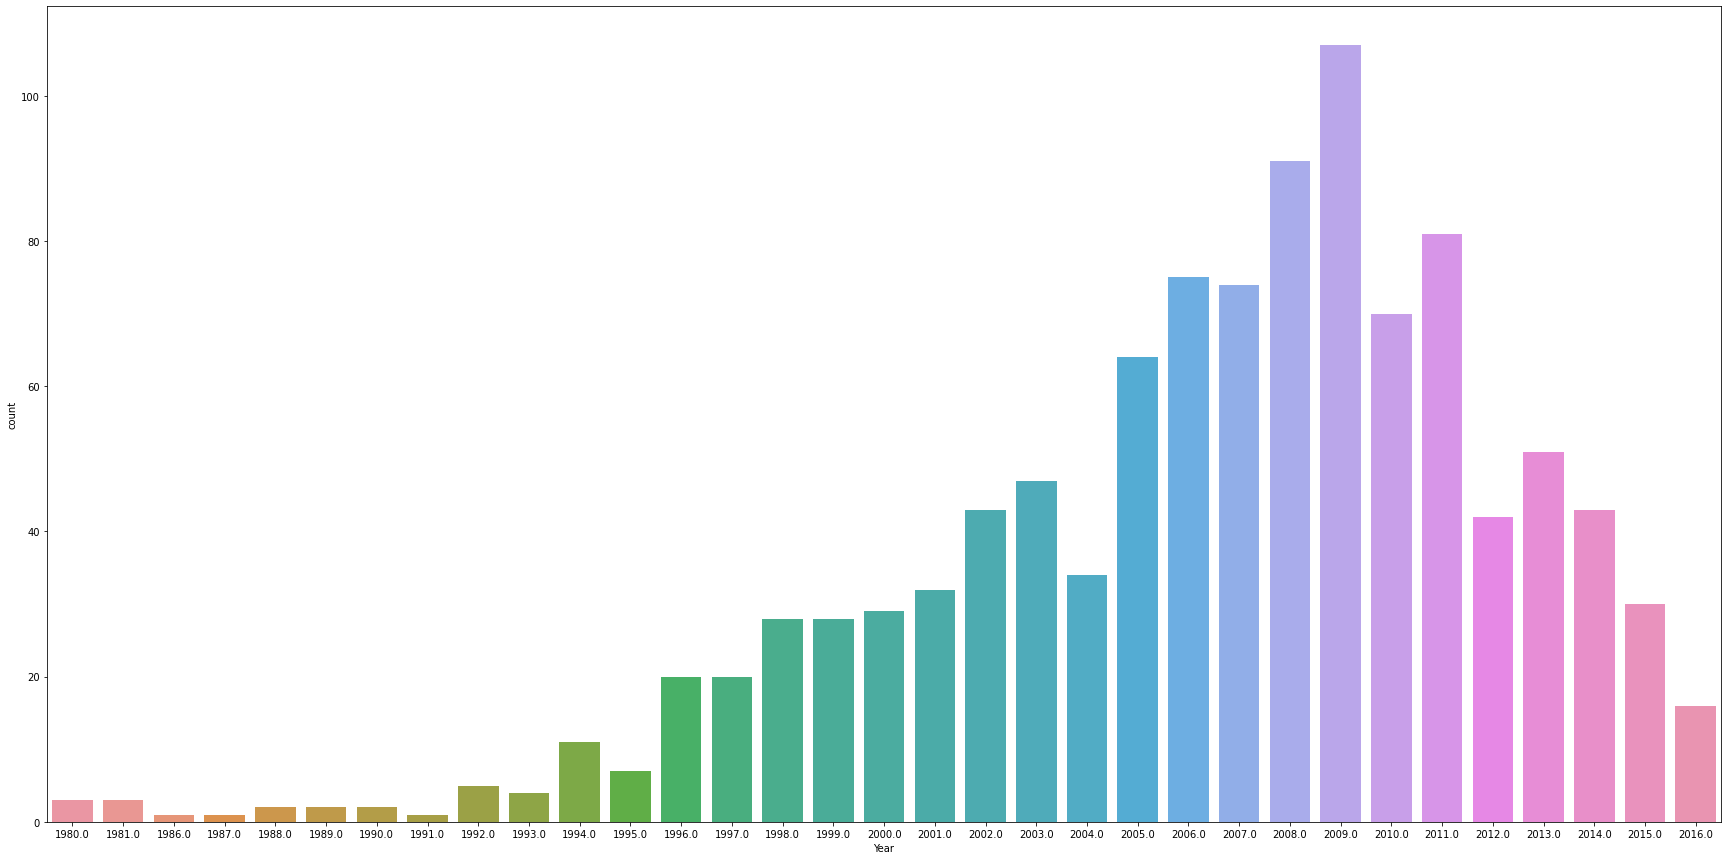

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x ='Year', data = df)

####The above time series graph depicts the frequency count of game releases in each year. It shows a trend but no seasonality.

###**Time Series Analysis of Sales region wise**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Average sales over the course of years')

<Figure size 720x720 with 0 Axes>

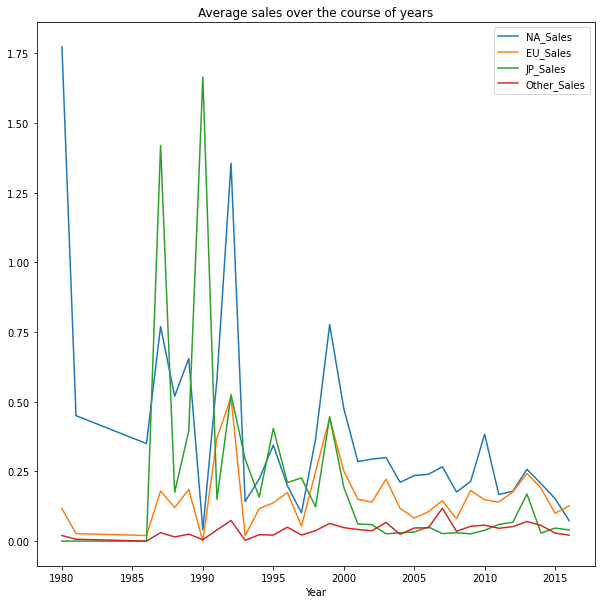

In [ ]:
df5 = df.groupby(['Year'])
plt.figure(figsize=(10,10))
df5_mean = df5['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].aggregate(np.mean)
df5_mean.plot(figsize=(10,10))
plt.title('Average sales over the course of years')

####The above graph shows trend and seasonality in Japan and North America sales

###**Principal Component Analysis**
#### PCA is done with respect to 'Genre' as the target Variable.

In [ ]:
ndf = df.copy()
ndf.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,14517,Galaxy Angel II: Mugen Kairou no Kagi,PS2,2007.0,Strategy,Broccoli,0.00,0.00,0.03,0.00,0.03
1,6844,Pro Yaky? Spirits 2010,PSP,2010.0,Sports,Konami Digital Entertainment,0.00,0.00,0.24,0.00,0.24
2,4319,The Walking Dead: Season One,PS4,2014.0,Adventure,Telltale Games,0.12,0.25,0.01,0.08,0.45
3,13600,Doraemon: Shin Nobita no Daimakyou Peko to 5-n...,3DS,2014.0,Action,FuRyu,0.00,0.00,0.04,0.00,0.04
4,13521,D.C.F.S.: Da Capo Four Seasons,PS2,2005.0,Adventure,Kadokawa Shoten,0.00,0.00,0.04,0.00,0.04


In [ ]:
from sklearn import model_selection, preprocessing
for c in ndf.columns:
    if ndf[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(ndf[c].values)) 
        ndf[c] = lbl.transform(list(ndf[c].values))

In [ ]:
variables = ['Name','Platform','Year','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']
x = ndf.loc[:, variables].values
y = ndf.loc[:,['Genre']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,-0.684029,-0.001232,0.103682,-1.179071,-0.435276,-0.366831,-0.151751,-0.366794,-0.418352
1,0.552683,0.437054,0.621442,-0.061300,-0.435276,-0.366831,0.464802,-0.366794,-0.252108
2,1.307515,0.290959,1.311790,1.254784,-0.239853,0.214584,-0.210471,0.204027,-0.085864
3,-0.990679,-1.754377,1.311790,-0.620186,-0.435276,-0.366831,-0.122392,-0.366794,-0.410436
4,-1.162538,-0.001232,-0.241492,-0.133415,-0.435276,-0.366831,-0.122392,-0.366794,-0.410436
...,...,...,...,...,...,...,...,...,...
1062,-1.384944,1.167531,0.794029,-1.503585,-0.190997,-0.320318,-0.239831,-0.295442,-0.299606
1063,-1.034486,1.459722,0.794029,-0.890614,0.167279,-0.017982,-0.239831,-0.010031,0.009133
1064,-1.738772,-0.001232,-0.586666,-1.341328,-0.288709,-0.204035,-0.239831,-0.224089,-0.299606
1065,1.176093,1.167531,0.966616,-1.503585,-0.256138,-0.273805,-0.239831,-0.295442,-0.315439


In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-0.830114,0.459562
1,-0.543319,-0.528966
2,-0.109885,-1.737805
3,-0.869236,0.685146
4,-0.780697,0.544415
...,...,...
1062,-0.707775,-0.472594
1063,-0.110030,-0.970589
1064,-0.562107,1.111597
1065,-0.708044,-1.187289


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance#53.7% variance explained by Principal component 1 and 2

array([0.39553312, 0.14206009])

In [ ]:
finalDf = pd.concat([principalDf, df[['Genre']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Genre
0,-0.830114,0.459562,Strategy
1,-0.543319,-0.528966,Sports
2,-0.109885,-1.737805,Adventure
3,-0.869236,0.685146,Action
4,-0.780697,0.544415,Adventure


In [ ]:
df['Platform'].describe()

count     1067
unique      26
top        PS2
freq       160
Name: Platform, dtype: object

#**Games with heighest sales region wise**

In [ ]:
top_game_NA = df.loc[df['NA_Sales']==max(df['NA_Sales'])]
print("NORTH AMERICA : ", top_game_NA['Name'])
print()
top_game_EU = df.loc[df['EU_Sales']==max(df['EU_Sales'])]
print("EUROPE : ", top_game_EU['Name'])
print()
top_game_JP = df.loc[df['JP_Sales']==max(df['JP_Sales'])]
print("JAPAN : ", top_game_JP['Name'])
print()
top_game_Global = df.loc[df['Global_Sales']==max(df['Global_Sales'])]
print("GLOBALLY : ", top_game_Global['Name'])
print()

NORTH AMERICA :  993    Pokemon Gold/Pokemon Silver
Name: Name, dtype: object

EUROPE :  1013    The Sims 3
Name: Name, dtype: object

JAPAN :  993    Pokemon Gold/Pokemon Silver
Name: Name, dtype: object

GLOBALLY :  993    Pokemon Gold/Pokemon Silver
Name: Name, dtype: object



With respect to the sales region wise we have calculated to find the games with the heighest sales. It is seen that Pokemon Gold/Pokemon silver is the most popular in North America, Japan and globally.

#**Games which are available for more than one platforms**

---
#### The below table displays the game names with the platform count for each game(those games with count>1). This is a clear indication of the popularity of that specific game with respect to platforms.

##### From the below table it is seen that 'The Walking Dead: Season One' has the most platform diversity.


In [ ]:
ddf = df.copy()
multiple_platform_title = ddf.groupby('Name').agg({'Name':lambda x : len(x) if (len(x) > 1) else None}).dropna()
multiple_platform_title.Name = multiple_platform_title.Name.astype(np.int64)
multiple_platform_title.index.name = None
multiple_platform_title = multiple_platform_title.sort_values( by='Name',ascending=False)
multiple_platform_title.columns = ['Platform_count']
multiple_platform_title

,Platform_count
The Walking Dead: Season One,3
Backyard Baseball '09,2
Star Wars: The Force Unleashed II,2
Rage,2
SD Gundam G Generation Wars,2
Shaun White Snowboarding,2
Ski-Doo Snowmobile Challenge,2
Space Chimps,2
Spider-Man: Web of Shadows,2
TRON: Evolution,2


#**Predictive Analysis (Forecasting Sales)**
                                                          

In [ ]:
data = df.copy()

####Encoding all the categorical data points.

In [ ]:
from sklearn import model_selection, preprocessing
for c in data.columns:
    if data[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[c].values)) 
        data[c] = lbl.transform(list(data[c].values))

In [ ]:
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,14517,313,13,2007.0,11,29,0.00,0.00,0.03,0.00,0.03
1,6844,680,16,2010.0,10,91,0.00,0.00,0.24,0.00,0.24
2,4319,904,15,2014.0,1,164,0.12,0.25,0.01,0.08,0.45
3,13600,222,1,2014.0,0,60,0.00,0.00,0.04,0.00,0.04
4,13521,171,13,2005.0,1,87,0.00,0.00,0.04,0.00,0.04


####The below heatmap shows the correlation between all the variables including the encoded ones.

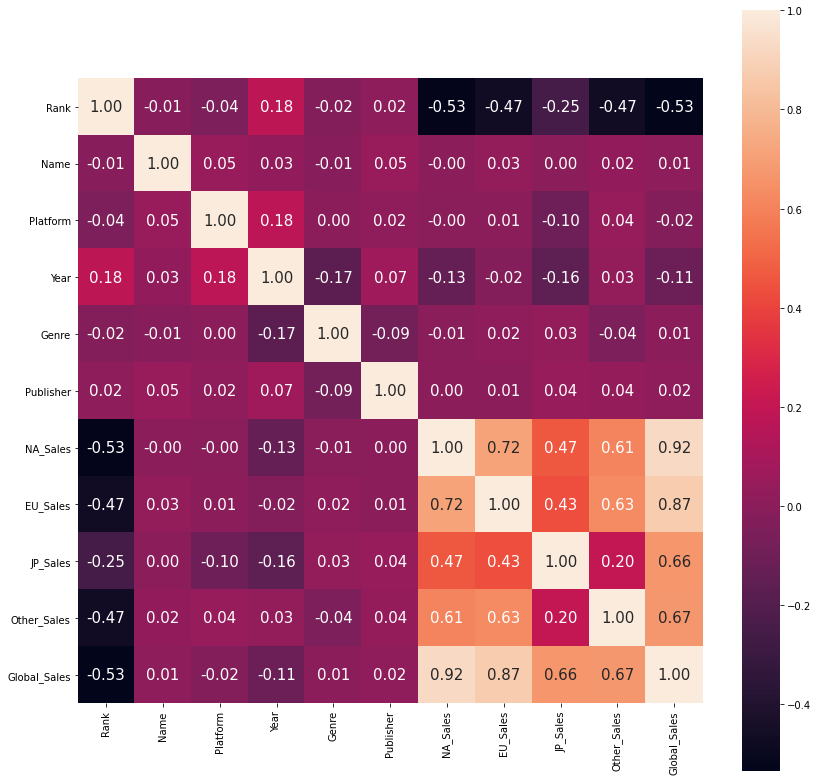

In [ ]:
corr=data.corr()
corr = (corr)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### **Splitting of dataset into training and testing in 80-20 ratio**

In [ ]:
from sklearn.model_selection import train_test_split
#Dataset without the target variable
X = data.drop(columns=['Global_Sales']) 

#Reshaping the target column into a vector
target = data['Global_Sales'] 

#Split the dataset into train and test set in the ratio 80-20
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, target, test_size=0.2, random_state=2)

In [ ]:
Xtrain

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
645,2450,440,1,2016.0,0,115,0.26,0.10,0.44,0.04
939,14552,658,17,2015.0,0,139,0.00,0.00,0.03,0.00
70,8629,241,23,2013.0,0,162,0.09,0.05,0.00,0.01
200,16409,866,11,2014.0,0,11,0.00,0.01,0.00,0.00
470,5864,274,10,1990.0,10,112,0.00,0.00,0.30,0.00
...,...,...,...,...,...,...,...,...,...,...
360,6550,162,6,2003.0,6,174,0.20,0.05,0.00,0.01
466,3165,610,14,2010.0,7,146,0.17,0.20,0.20,0.07
299,4254,96,13,2005.0,8,169,0.38,0.01,0.00,0.06
493,10110,467,3,2010.0,9,42,0.11,0.00,0.00,0.01


The shape of the training and testing dataset.

In [ ]:
print(Xtrain.shape)
Xtest.shape

(853, 10)


(214, 10)

#**Extreme Gradient Boosting(XGBoost)**

####We are training a model on a dataset and used for the prediction. Boosting takes an iterative approach to train the models in succession, with each new model being trained to correct the errors made by previous one.

In [ ]:
import xgboost as xg
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

####We can define the parameters of our gradient boosting ensemble. We’ve set up some of the most important ones below to get us started.

In [ ]:
xg_para = {
    'eta': 0.01,
    'max_depth': 5, #maximum depth of the decision trees being trained
    'subsample': 0.6,
    'colsample_bytree': 0.7, #range 0.5 to 0.9 
    'objective': 'reg:linear', #the loss function being used
    'eval_metric': 'rmse',
    'silent': 1
}

####In order for XGBoost to be able to use our data, we’ll need to transform it into a specific format that XGBoost can handle. That format is called DMatrix.

In [ ]:
train_data = xg.DMatrix(Xtrain, Ytrain)

In [ ]:
cv_output = xg.cv(xg_para, train_data, num_boost_round=1000, early_stopping_rounds=20, verbose_eval=50, show_stdv=False) 
#early_stopping_rounds is used to avoid overfitting : It works by monitoring the performance of the model that is being trained 
#on a separate test dataset and stopping the training procedure once the performance on the test dataset has not improved after a fixed number of training iterations.

[0]	train-rmse:1.3079	test-rmse:1.26563
[50]	train-rmse:0.945655	test-rmse:0.944204
[100]	train-rmse:0.702127	test-rmse:0.741258
[150]	train-rmse:0.533555	test-rmse:0.609394
[200]	train-rmse:0.419094	test-rmse:0.517964
[250]	train-rmse:0.339274	test-rmse:0.460965
[300]	train-rmse:0.282967	test-rmse:0.426893
[350]	train-rmse:0.235782	test-rmse:0.400716
[400]	train-rmse:0.199641	test-rmse:0.384396
[450]	train-rmse:0.16874	test-rmse:0.373939
[500]	train-rmse:0.148114	test-rmse:0.365999
[550]	train-rmse:0.128052	test-rmse:0.359541
[600]	train-rmse:0.110836	test-rmse:0.354433
[650]	train-rmse:0.0953747	test-rmse:0.352494
[700]	train-rmse:0.0841333	test-rmse:0.349878
[750]	train-rmse:0.0717983	test-rmse:0.347579
[800]	train-rmse:0.0633817	test-rmse:0.346303
[850]	train-rmse:0.0566127	test-rmse:0.345313
[900]	train-rmse:0.050154	test-rmse:0.344691
[950]	train-rmse:0.044522	test-rmse:0.344091
[999]	train-rmse:0.0403453	test-rmse:0.343375


In [ ]:
#all 1000 rounds were executed

In [ ]:
len(cv_output)

1000

#**Modeling of data using XGBoost**

####We fit our model with training data.

In [ ]:
model = xg.train(dict(xg_para, silent=0), train_data, num_boost_round= 1000)

[09:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


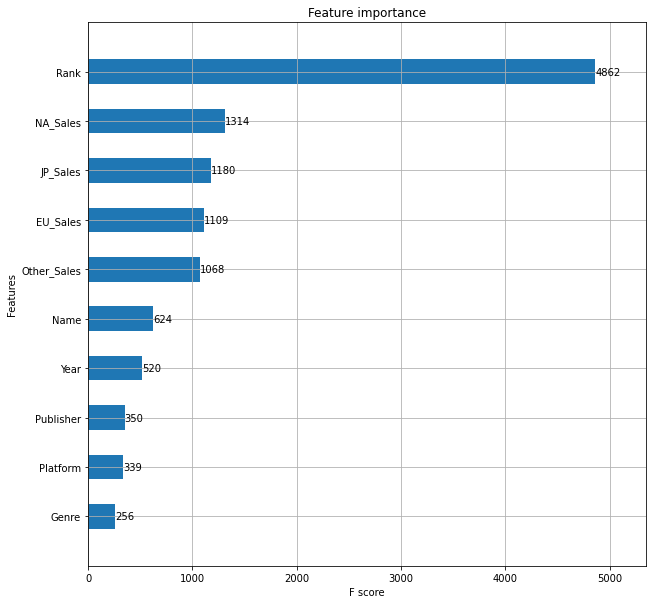

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)
)
xg.plot_importance(model, max_num_features=10, height=0.5, ax=ax)

####We can examine the relative importance attributed to each feature, in determining the Global_Sales.

In [ ]:
test_data = xg.DMatrix(Xtest, Ytest)

####Finally we use our model to predict the sales.

In [ ]:
tgt = model.predict(test_data)
res = pd.DataFrame({'Actual_Global_Sales': Ytest, 'Predicted_Global_Sales':
                    tgt,'Diff' :(Ytest-tgt)})
res[['Actual_Global_Sales','Predicted_Global_Sales','Diff']].head(5)

,Actual_Global_Sales,Predicted_Global_Sales,Diff
455,0.42,0.434980,-0.014980
954,0.06,0.060431,-0.000431
738,2.32,2.347617,-0.027617
913,0.13,0.132724,-0.002724
702,0.67,0.665667,0.004333


##**Evaluating the model using**
####We use the Root mean squared Error to evaluate the model performance.

In [ ]:
from sklearn.metrics import accuracy_score
#print(np.array(Ytest)
pred = [round(value) for value in tgt]
ytest = [round(value) for value in Ytest]
accuracy = accuracy_score(ytest,pred)
 
print(accuracy*100.0) 

99.53271028037383


###**Residual plot**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


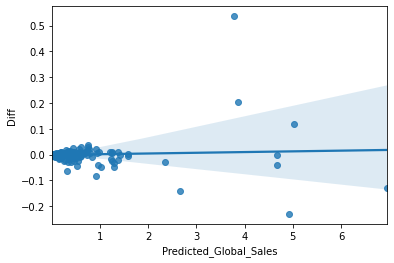

In [ ]:
sns.regplot(res['Predicted_Global_Sales'],res['Diff'])

###**Linear Regression modeling with all variables**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
lr_score_train = lr.score(Xtrain, Ytrain
                          )
print("Training score: ",lr_score_train)
lr_score_test = lr.score(Xtest, Ytest)
print("Testing score: ",lr_score_test)

Training score:  0.9999859314466547
Testing score:  0.9999717792715515


##**Linear Regression modelling with the most influential variables with respect to PCA**



In [ ]:
variables =['Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales']
x = data.loc[:, variables].values
y = data.loc[:,['Global_Sales']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7
0,-0.001232,0.103682,1.581130,-1.179071,-0.435276,-0.366831,-0.151751,-0.366794
1,0.437054,0.621442,1.315826,-0.061300,-0.435276,-0.366831,0.464802,-0.366794
2,0.290959,1.311790,-1.071906,1.254784,-0.239853,0.214584,-0.210471,0.204027
3,-1.754377,1.311790,-1.337210,-0.620186,-0.435276,-0.366831,-0.122392,-0.366794
4,-0.001232,-0.241492,-1.071906,-0.133415,-0.435276,-0.366831,-0.122392,-0.366794
...,...,...,...,...,...,...,...,...
1062,1.167531,0.794029,-0.541299,-1.503585,-0.190997,-0.320318,-0.239831,-0.295442
1063,1.459722,0.794029,-1.337210,-0.890614,0.167279,-0.017982,-0.239831,-0.010031
1064,-0.001232,-0.586666,0.519915,-1.341328,-0.288709,-0.204035,-0.239831,-0.224089
1065,1.167531,0.966616,-1.337210,-1.503585,-0.256138,-0.273805,-0.239831,-0.295442


####**Finding Influential variables using PCA**

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

# pca = PCA()
# data_pca = pca.fit_transform(x)
# data_pca = pd.DataFrame(data_pca)
# data_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.701074,1.028666,-1.469247
1,-0.493155,0.213880,-0.834533
2,-0.097826,-1.903023,0.942685
3,-0.773156,-0.380106,1.264980
4,-0.657968,-0.196578,0.548596
...,...,...,...
1062,-0.644421,-0.833585,-1.316515
1063,-0.139823,-1.572543,-0.774455
1064,-0.447906,0.985882,-1.010834
1065,-0.676315,-1.298300,-0.921207


In [ ]:
explained_var = pca.explained_variance_ratio_
explained_var #62.03% 

array([0.32209809, 0.16692741, 0.13136458])

In [ ]:
from sklearn.model_selection import train_test_split
#Dataset without the target variable
#X = data.drop(columns=['Global_Sales']) 
X=principalDf[['principal component 1', 'principal component 2', 'principal component 3']]

#Reshaping the target column into a vector
target = data['Global_Sales'] 

#Split the dataset into train and test set in the ratio 80-20
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, target, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
lr_score_train = lr.score(Xtrain, Ytrain
                          )
print("Training score: ",lr_score_train)
lr_score_test = lr.score(Xtest, Ytest)
print("Testing score: ",lr_score_test)

Training score:  0.9775207528893327
Testing score:  0.9494617273477173
